### This file plots the processed csv files with matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [14]:
date = '2018-10-21_20h12'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/' + date + '/'



## Throughput plot for read and write loads

In [21]:
# read data into pandas dataframe
df_w = pd.read_csv(base_path + 'one_server_mem_tp.csv')
df_w = df_w[df_w['client']<=240]
df_w

,client,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,12,9947.553333,72.190791,2945.853333,2.557529
1,24,11120.603333,18.342131,2944.166667,0.747321
2,48,13066.150000,129.464119,2934.293333,29.533317
3,96,15624.403333,50.798804,2924.296667,16.856675
4,144,16493.456667,101.790879,2933.376667,6.351170
5,192,16781.750000,69.410255,2928.560000,3.176445
6,240,16798.276667,40.505218,2941.490000,12.631991


In [22]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

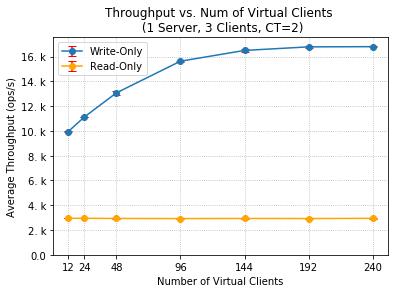

In [26]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (1 Server, 3 Clients, CT=2)")

vcs = df_w['client']

# write-only
tps = df_w['write_tp_mean']
std = df_w['write_tp_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Write-Only", capsize = 4, ecolor='r', marker='o')

# read-only
tps = df_w['read_tp_mean']
std = df_w['read_tp_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Read-Only", capsize = 4, ecolor='r', marker='o', color='orange')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/"+date+"/one_server_mem_tp.png", dpi = 150)

## Response-time plot for read and write loads

In [24]:
# read data into pandas dataframe
df_r = pd.read_csv(base_path + 'one_server_mem_rt.csv')
df_r = df_r[df_r['client']<=240]
df_r

,client,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,12,1.206667,0.009813,4.082222,0.008315
1,24,2.154444,0.003143,8.146667,0.000000
2,48,3.656667,0.005443,16.292222,0.009558
3,96,6.096667,0.015154,32.582222,0.029355
4,144,8.727778,0.054046,49.008889,0.025288
5,192,11.437778,0.047945,65.575556,0.080753
6,240,14.285556,0.036952,81.553333,0.403439


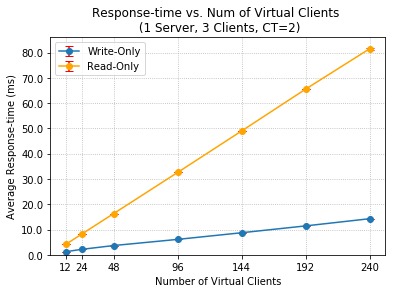

In [27]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (1 Server, 3 Clients, CT=2)")

vcs = df_r['client']

# write-only
tps = df_r['write_rt_mean']
std = df_r['write_rt_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Write-Only", capsize = 4, ecolor='r', marker='o')

# read-only
tps = df_r['read_rt_mean']
std = df_r['read_rt_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Read-Only", capsize = 4, ecolor='r', marker='o', color='orange')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/"+date+"/one_server_mem_rt.png", dpi = 150)